In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1D Ising model + Transfer matrix

* Construct the transfer matrix at temperature $T$ with external field $B$
* Find the eivenvalues of the transfer matrix and compare to the exact results.
* Evaluate the partition function $Z$ at different system size $N$ and $T$, $B$. Compare to the exact results.
* For a fixed $N$, $T$, $B$, evaluate $\langle S_0 S_j\rangle$ where $j=0,1,\cdots N$. 
* Plot $\langle S_0 S_j\rangle$ up to $j=N/2$ and show that it decays exponentially.
  * Please try several $N$, $T$, $B$. What is the largest $N$ you can go? What is the lowest $T$ you can go?

* Construct the transfer matrix at temperature $T$ with external field $B$

In [2]:
k_B = 1
J = 1

def transfer_matrix(T, B):
    beta = 1 / (k_B*T)
    return np.array([[np.exp(beta*J + beta*B), np.exp(-beta*J)],
                    [np.exp(-beta*J), np.exp(beta*J - beta*B)]])

def impurity_matrix():
    return np.array([[1, 0],
                   [0, -1]])

In [3]:
T = 1
B = 0
TM = transfer_matrix(T, B)
print(TM)

[[2.71828183 0.36787944]
 [0.36787944 2.71828183]]


* Find the eivenvalues of the transfer matrix and compare to the exact results.

In [4]:
T = 3
B = 2

The eivenvalues of the transfer matrix:

In [5]:
TM = transfer_matrix(T, B)

[lambda_1, lambda_2], _ = np.linalg.eig(TM)

print(lambda_1, lambda_2)

2.948328339165514 0.4864847998673202


Exact results:

In [6]:
def lambda_exact(T, B):
    beta = 1 / (k_B*T)
    lambda_1_exact = np.exp(beta*J)*np.cosh(beta*B) + np.sqrt(np.exp(-2*beta*J) + np.exp(2*beta*J)*np.sinh(beta*B)**2)
    lambda_2_exact = np.exp(beta*J)*np.cosh(beta*B) - np.sqrt(np.exp(-2*beta*J) + np.exp(2*beta*J)*np.sinh(beta*B)**2)
    return lambda_1_exact, lambda_2_exact

lambda_1_exact, lambda_2_exact = lambda_exact(T, B)

print(lambda_1_exact, lambda_2_exact)

2.9483283391655144 0.4864847998673205


* Evaluate the partition function $Z$ at different system size $N$ and $T$, $B$. Compare to the exact results.

In [7]:
T = 3
B = 2
N = 128

In [8]:
def partition_fn(T, B, N):
    TM = transfer_matrix(T, B)
    Z = np.trace(np.linalg.matrix_power(TM, N))
    [lambda_1, lambda_2], _ = np.linalg.eig(TM)
    return Z, lambda_1, lambda_2

Z, lambda_1, lambda_2 = partition_fn(T, B, N)

print(Z)
print(lambda_1**N + lambda_2**N)
print(lambda_1**N)

1.2755820527073087e+60
1.275582052707295e+60
1.275582052707295e+60


In [9]:
def Z_exact(T, B, N):
    beta = 1 / (k_B*T)
    Z = (np.exp(beta*J)*np.cosh(beta*B) + np.sqrt(np.exp(2*beta*J)*np.sinh(beta*B)**2 + np.exp(-2*beta*J)))**N
    return Z

Z_exact(T, B, N)

1.2755820527073195e+60

Partition functions at three different system size $N$ and $T$, $B$:

In [10]:
Z1, _, _ = partition_fn(1, 2, 3)
Z2, _, _ = partition_fn(2, 1, 30)
Z3, _, _ = partition_fn(3, 0, 300)
print('Z1 = %f \nZ2 = %f \nZ3 = %f \n' %(Z1, Z2, Z3))

Z1 = 8111.437921 
Z2 = 83253871548643.515625 
Z3 = 26124070434391398246424943012605985241304404506436604226004735914648209834940682543193244286582784.000000 



The corresponding exact partition functions are:

In [11]:
Z1_exact = Z_exact(1, 2, 3)
Z2_exact = Z_exact(2, 1, 30)
Z3_exact = Z_exact(3, 0, 300)
print('Z1_exact = %f \nZ2_exact = %f \nZ3_exact = %f \n' %(Z1_exact, Z2_exact, Z3_exact))

Z1_exact = 8111.390868 
Z2_exact = 83253871548643.453125 
Z3_exact = 26124070434391671434237912255756583290635051563782850814466477621768385871060802076608351269027840.000000 



* For a fixed $N$, $T$, $B$, evaluate $\langle S_0 S_j\rangle$ where $j=0,1,\cdots N$. 

In [12]:
N = 128
T = 1
B = 0

def S0Sj(T, B, N, j):
    TM = transfer_matrix(T, B)
    Tz = impurity_matrix()
    Z_S0Sj = Tz
    for i in range(N):
        Z = TM @ TM
        if i == j:
            Z_S0Sj = Z_S0Sj @ Tz @ TM   
        else:
            Z_S0Sj = Z_S0Sj @ TM
        S0Sj = np.trace(Z_S0Sj) / np.trace(Z)
    return S0Sj

print('S0Sj(0)   = %f \nS0Sj(N/2) = %f \nS0Sj(N)   = %f \n' %(S0Sj(T, B, N, 0), S0Sj(T, B, N, N//2), S0Sj(T, B, N, N)))

S0Sj(0)   = 29382014204194908907253317479387257592572127907110237929209856.000000 
S0Sj(N/2) = 1582785792489854345148656750203354094580878522730938368.000000 
S0Sj(N)   = 0.000000 



* Plot $\langle S_0 S_j\rangle$ up to $j=N/2$ and show that it decays exponentially.
  * Please try several $N$, $T$, $B$. What is the largest $N$ you can go? What is the lowest $T$ you can go?

In [13]:
def correlation_fn(T, B, N):
    correlation_fn = np.empty(0)
    for i in range(N//2):
        correlation_fn = np.append(correlation_fn, S0Sj(T, B, N, i))
    return correlation_fn

Try different N:

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:1576: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in matmul
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in matmul
  


Text(0.5, 1.0, 'N = 800')

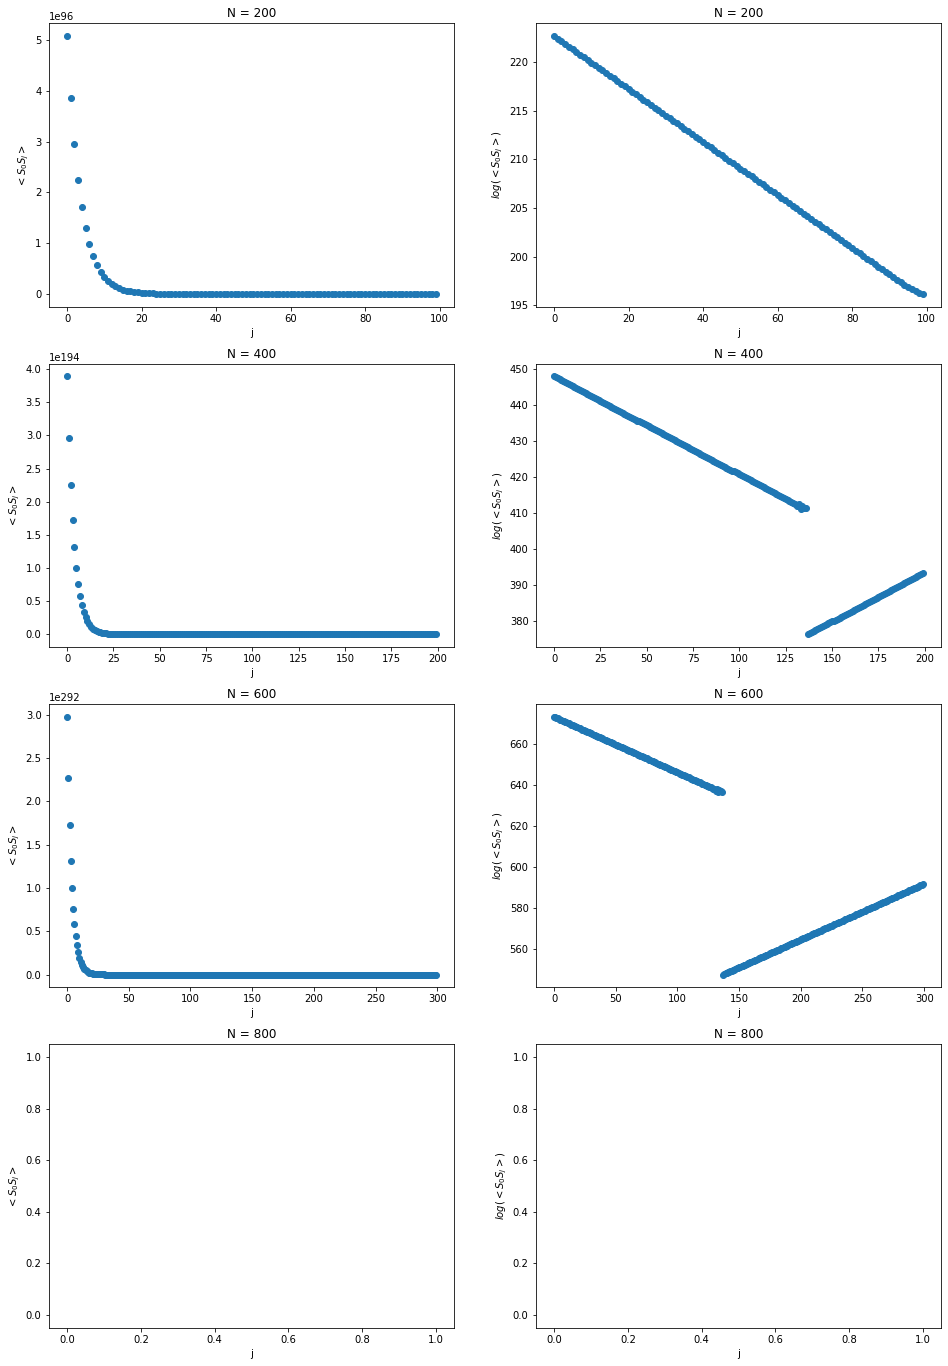

In [14]:
T = 1
B = 0

N = 200

plt.figure(figsize=(16, 24))
plt.subplot(4, 2, 1)
plt.plot(np.arange(N//2), correlation_fn(T, B, N), 'o')
plt.xlabel('j')
plt.ylabel('$<S_0S_j>$')
plt.title('N = 200')

plt.subplot(4, 2, 2)
plt.plot(np.arange(N//2), np.log(correlation_fn(T, B, N)), 'o')
plt.xlabel('j')
plt.ylabel('$log(<S_0S_j>)$')
plt.title('N = 200')

N = 400

plt.subplot(4, 2, 3)
plt.plot(np.arange(N//2), correlation_fn(T, B, N), 'o')
plt.xlabel('j')
plt.ylabel('$<S_0S_j>$')
plt.title('N = 400')

plt.subplot(4, 2, 4)
plt.plot(np.arange(N//2), np.log(correlation_fn(T, B, N)), 'o')
plt.xlabel('j')
plt.ylabel('$log(<S_0S_j>)$')
plt.title('N = 400')

N = 600

plt.subplot(4, 2, 5)
plt.plot(np.arange(N//2), correlation_fn(T, B, N), 'o')
plt.xlabel('j')
plt.ylabel('$<S_0S_j>$')
plt.title('N = 600')

plt.subplot(4, 2, 6)
plt.plot(np.arange(N//2), np.log(correlation_fn(T, B, N)), 'o')
plt.xlabel('j')
plt.ylabel('$log(<S_0S_j>)$')
plt.title('N = 600')

N = 800

plt.subplot(4, 2, 7)
plt.plot(np.arange(N//2), correlation_fn(T, B, N), 'o')
plt.xlabel('j')
plt.ylabel('$<S_0S_j>$')
plt.title('N = 800')

plt.subplot(4, 2, 8)
plt.plot(np.arange(N//2), np.log(correlation_fn(T, B, N)), 'o')
plt.xlabel('j')
plt.ylabel('$log(<S_0S_j>)$')
plt.title('N = 800')

Try different T:

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in matmul
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in matmul
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:1576: RuntimeWarning: invalid value encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in matmul
  if sys.path[0] == '':


Text(0.5, 1.0, 'T = 0.1')

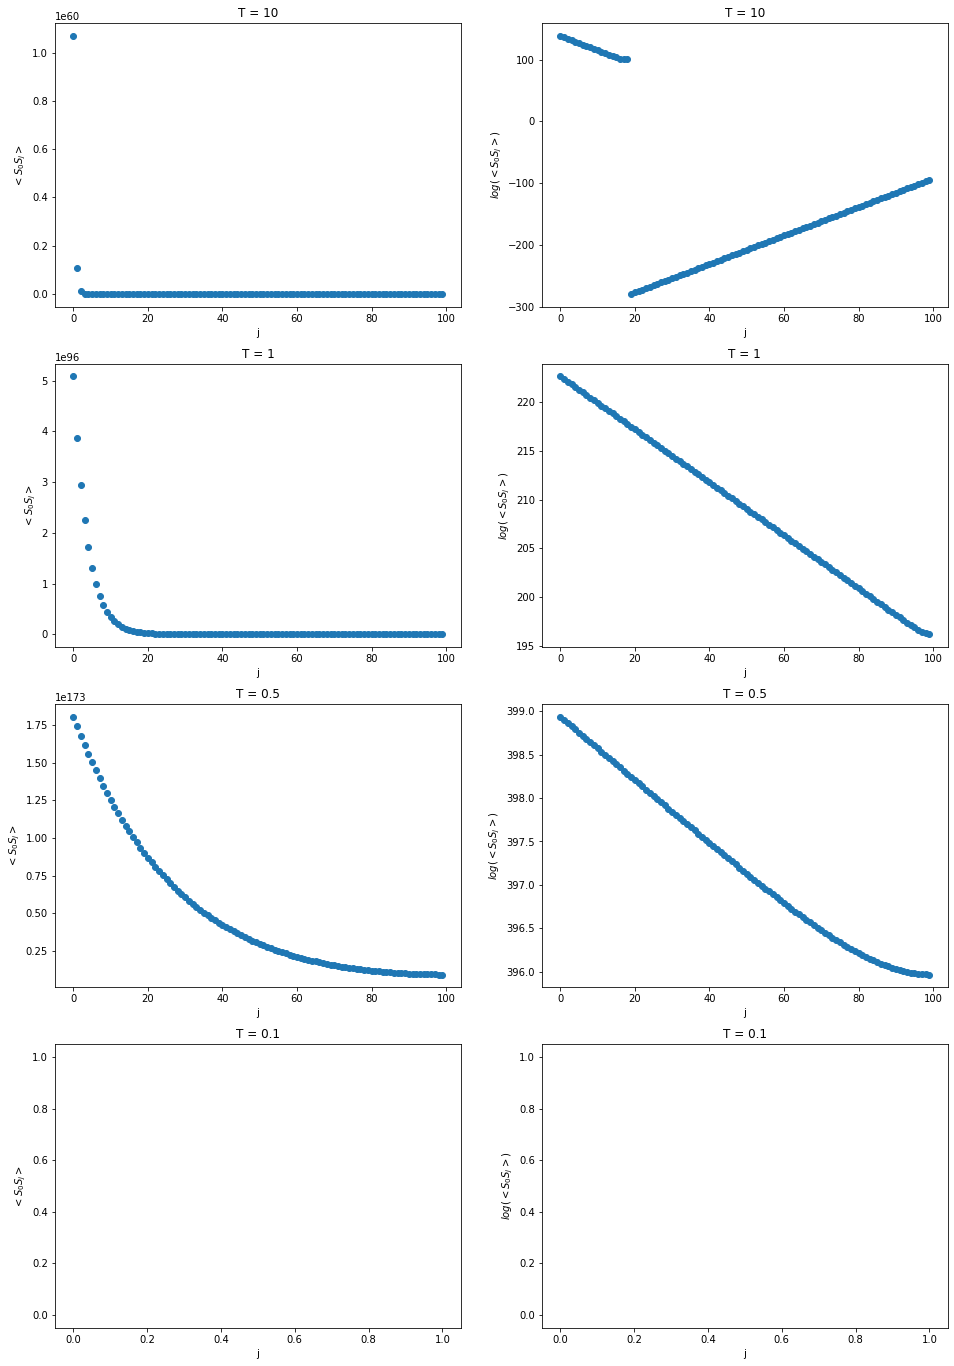

In [15]:
B = 0
N = 200

T = 10

plt.figure(figsize=(16, 24))
plt.subplot(4, 2, 1)
plt.plot(np.arange(N//2), correlation_fn(T, B, N), 'o')
plt.xlabel('j')
plt.ylabel('$<S_0S_j>$')
plt.title('T = 10')

plt.subplot(4, 2, 2)
plt.plot(np.arange(N//2), np.log(correlation_fn(T, B, N)), 'o')
plt.xlabel('j')
plt.ylabel('$log(<S_0S_j>)$')
plt.title('T = 10')

T = 1

plt.subplot(4, 2, 3)
plt.plot(np.arange(N//2), correlation_fn(T, B, N), 'o')
plt.xlabel('j')
plt.ylabel('$<S_0S_j>$')
plt.title('T = 1')

plt.subplot(4, 2, 4)
plt.plot(np.arange(N//2), np.log(correlation_fn(T, B, N)), 'o')
plt.xlabel('j')
plt.ylabel('$log(<S_0S_j>)$')
plt.title('T = 1')

T = 0.5

plt.subplot(4, 2, 5)
plt.plot(np.arange(N//2), correlation_fn(T, B, N), 'o')
plt.xlabel('j')
plt.ylabel('$<S_0S_j>$')
plt.title('T = 0.5')

plt.subplot(4, 2, 6)
plt.plot(np.arange(N//2), np.log(correlation_fn(T, B, N)), 'o')
plt.xlabel('j')
plt.ylabel('$log(<S_0S_j>)$')
plt.title('T = 0.5')

T = 0.1

plt.subplot(4, 2, 7)
plt.plot(np.arange(N//2), correlation_fn(T, B, N), 'o')
plt.xlabel('j')
plt.ylabel('$<S_0S_j>$')
plt.title('T = 0.1')

plt.subplot(4, 2, 8)
plt.plot(np.arange(N//2), np.log(correlation_fn(T, B, N)), 'o')
plt.xlabel('j')
plt.ylabel('$log(<S_0S_j>)$')
plt.title('T = 0.1')

Try different B:

Text(0.5, 1.0, 'B = 30')

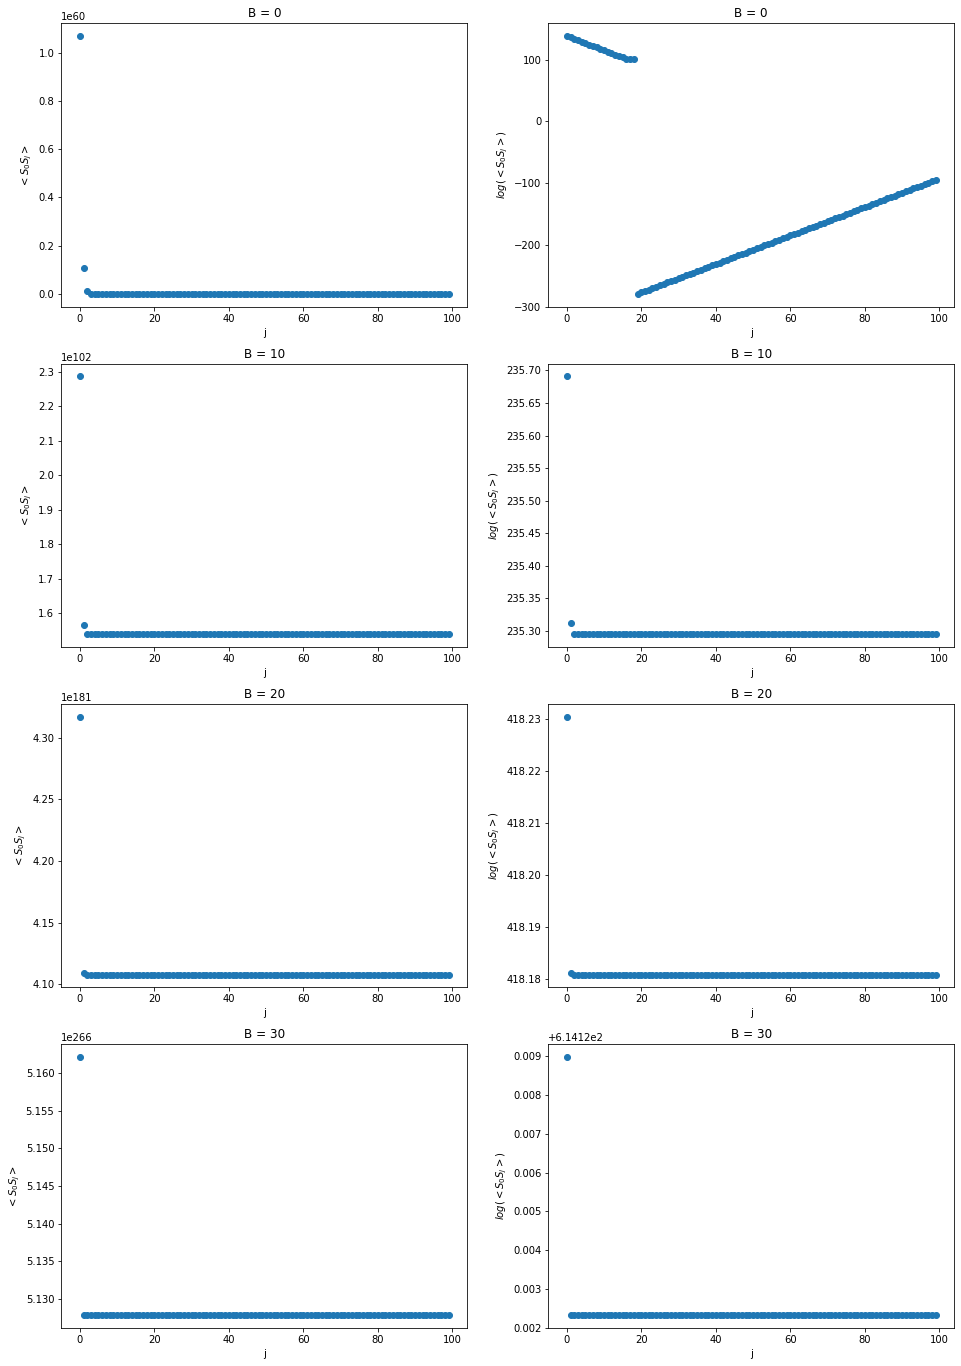

In [16]:
N = 200
T = 10

B = 0

plt.figure(figsize=(16, 24))
plt.subplot(4, 2, 1)
plt.plot(np.arange(N//2), correlation_fn(T, B, N), 'o')
plt.xlabel('j')
plt.ylabel('$<S_0S_j>$')
plt.title('B = 0')

plt.subplot(4, 2, 2)
plt.plot(np.arange(N//2), np.log(correlation_fn(T, B, N)), 'o')
plt.xlabel('j')
plt.ylabel('$log(<S_0S_j>)$')
plt.title('B = 0')

B = 10

plt.subplot(4, 2, 3)
plt.plot(np.arange(N//2), correlation_fn(T, B, N), 'o')
plt.xlabel('j')
plt.ylabel('$<S_0S_j>$')
plt.title('B = 10')

plt.subplot(4, 2, 4)
plt.plot(np.arange(N//2), np.log(correlation_fn(T, B, N)), 'o')
plt.xlabel('j')
plt.ylabel('$log(<S_0S_j>)$')
plt.title('B = 10')

B = 20

plt.subplot(4, 2, 5)
plt.plot(np.arange(N//2), correlation_fn(T, B, N), 'o')
plt.xlabel('j')
plt.ylabel('$<S_0S_j>$')
plt.title('B = 20')

plt.subplot(4, 2, 6)
plt.plot(np.arange(N//2), np.log(correlation_fn(T, B, N)), 'o')
plt.xlabel('j')
plt.ylabel('$log(<S_0S_j>)$')
plt.title('B = 20')

B = 30

plt.subplot(4, 2, 7)
plt.plot(np.arange(N//2), correlation_fn(T, B, N), 'o')
plt.xlabel('j')
plt.ylabel('$<S_0S_j>$')
plt.title('B = 30')

plt.subplot(4, 2, 8)
plt.plot(np.arange(N//2), np.log(correlation_fn(T, B, N)), 'o')
plt.xlabel('j')
plt.ylabel('$log(<S_0S_j>)$')
plt.title('B = 30')